subwayTime.csv 파일을 가지고 다양한 데이터 분석을 해봅시다.

In [ ]:
import csv
file = open('subwayTime.csv', 'r', encoding='utf-8')

data = csv.reader(file)

for row in data : 
    print(row)

file.close()

헤더 건너뛰기, 데이터를 int 타입으로 변환해줬음

In [ ]:
import csv
file = open('subwayTime.csv', 'r', encoding='utf-8')

data = csv.reader(file)
next(data) # 헤더 건너뛰기
next(data)

for row in data : 
    row[4:] = map(int, row[4:]) # 4번째 컬럼부터 마지막 컬럼까지 int로 변환하는 것을 mapping(반복문 처리를 하지 않아도 내부에서 알아서 반복해준다.)
    print(row)
file.close()

문제. 출근 시간(06-11시)에 가장 많이 타고 내리는 역은? 

답. 1341427 강남_2호선

In [ ]:
import csv
file = open('subwayTime.csv', 'r', encoding='utf-8')

data = csv.reader(file)
next(data) # 헤더 건너뛰기
next(data)

maxCount = -99999
maxStation = ''

for row in data : 
    row[4:] = map(int, row[4:]) # 4번째 컬럼부터 마지막 컬럼까지 int로 변환하는 것을 mapping(반복문 처리를 하지 않아도 내부에서 알아서 반복해준다.)
    sumCount = sum(row[8:18])
    if sumCount > maxCount :
        maxCount = sumCount
        maxStation = row[3] + "_" + row[1]

print(maxCount, maxStation)




file.close()

문제. 밤 11시 ~ 새벽 1시까지 가장 많이 타는 역은?

In [ ]:
import csv
file = open('subwayTime.csv', 'r', encoding='utf-8')

data = csv.reader(file)
next(data) # 헤더 건너뛰기
next(data)

maxCount = -999999
maxStation = ''

for row in data : 
    row[4:] = map(int, row[4:]) # 4번째 컬럼부터 마지막 컬럼까지 int로 변환하는 것을 mapping(반복문 처리를 하지 않아도 내부에서 알아서 반복해준다.)
    sumCount = sum(row[42:46:2]) # 42부터 46까지 2씩 건너뛰어서 더하기
    if sumCount > maxCount :
        maxCount = sumCount
        maxStation = row[3] + "_" + row[1]

print(maxCount, maxStation)


file.close()

문제. 시간대별 사람들이 가장 많이 타고 내리는 역 & 시간대별 가장 많이 타고 내리는 인원수를 차트로 나타내보자

In [ ]:
import csv
import matplotlib.pyplot as plt


file = open('subwayTime.csv','r',encoding='utf-8')
data = csv.reader(file)
next(data) # 헤더 건너뛰기
next(data)


maxInCount = [0] * 24
maxStation = [''] * 24

for row in data :
    row[4:] = map(int, row[4:]) # int로 변환 4번째 컬럼부터 마지막 컬럼까지 int 로 변환하는것을 
    #변환하는 것을 mapping (반복문 처리를 하지 않아도 내부에서 반복해줌 (맵함수))
    for i in range(24) :
        sumCount = row[i * 2 + 4 ] #+ row[(i * 2 + 4)+ 1]
        if sumCount > maxInCount[i] :
            maxInCount[i] = sumCount
            maxStation[i] = row[3] + '(' + str(i + 4) + ')'
print(maxStation)
print(maxInCount)

plt.title('시간대별 승차인원이 많은 역')
plt.rc('font', family='D2Coding')
plt.bar(range(24), maxInCount)
plt.xticks(range(24), maxStation, rotation=90)
plt.show()


file.close()

문제. 시간대별 하차 인원이 많은 역

In [ ]:
import csv
import matplotlib.pyplot as plt
file = open('subwayTime.csv', 'r', encoding='utf-8')
data = csv.reader(file)
next(data)  # 헤더 건너뛰기
next(data)
maxOutCount = [0] * 24
maxOUtStation = [''] * 24 
for row in data :
    row[4:] = map(int, row[4:])  # 4번째 컬럼부터 마지막 컬럼 까지 int로 변환하는것을 mapping (반복문 처리를 하지 않아도 내부에서 반복해줌)
    for i in range(24) :
        sumOutCount = row[i * 2 + 5] 
        
        
        if sumOutCount > maxOutCount[i] :
            maxOutCount[i] = sumOutCount
            maxOUtStation[i] = row[3] + '(' + str(i + 4) + ')'
        
        
print(maxOUtStation)
print(maxOutCount)


plt.rc('font', family='D2Coding')  # 한글폰트 설정
plt.title('시간대별 하차인원이 많은 역')
plt.bar(range(24), maxOutCount)
plt.xticks(range(24), maxOUtStation, rotation=90)
plt.show()
file.close()

문제. 지하철 시간대별 인원 추이를 나타내는 그래프를 그리세요.
시간대별 승차 인원은 파란색, 하차 인원은 빨간색으로 꺾은선 그래프로 나타내세요.

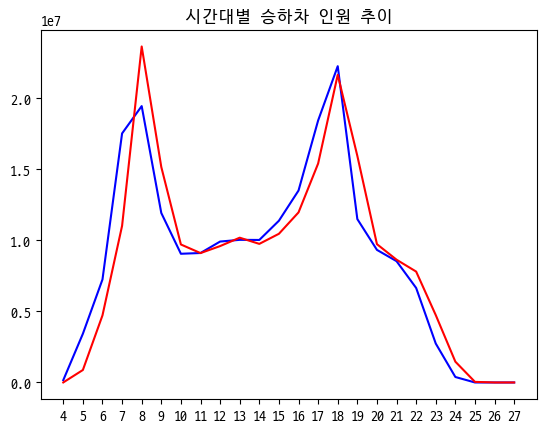

In [6]:
import csv
import matplotlib.pyplot as plt

file = open('subwayTime.csv', 'r', encoding='utf-8')
data = csv.reader(file)

# 헤더 건너뛰기
next(data)
next(data)

s_in = [0] * 24
s_out = [0] * 24

for row in data:
    row[4:] = map(int, row[4:])

    for i in range(24):
        s_in[i] += row[i * 2 + 4]
        s_out[i] += row[i * 2 + 5]

plt.rc('font', family='D2Coding')  # 한글폰트 설정
plt.title('시간대별 승하차 인원 추이')
plt.plot(s_in, label='승차', color = 'blue')
plt.plot(s_out, label='하차', color = 'red')
plt.xticks(range(24), range(4, 28))
plt.show()
file.close()
